# Aprendizaje Supervizado: Regresión Lineal Simple

## 1.-  Introducción

Este cuaderno tienen la intención de mostrar la **aplicación del algoritmo de regresión lineal** en el analisis de datos por medio de un ejercicio práctico. En el ámbito de la Ciencia de Datos (o Data Science), el algoritmo de regresión lineal forma parte del aprendizaje automático supervisado y se utiliza en el estudio de fenómenos que se describen por medio de variables continuas.

Es importante tener en cuenta, además, que **la regresión lineal busca determinar el grado de relación que existe entre una variable dependiente y dos o más variables independientes**, bajo el supuesto de que estas variables tienen una relación proporcional entre sí. Y esta es una de las razones de su nombre, ya que el patrón de comportamiento entre las variables (dependiente e independientes) es proporcional y se representa con una línea recta (a diferencia de otros tipos de regresión, como la cuadrática, en donde la relación entre las variables se representa mediante una curva).

Así mismo, la regresión lineal **se divide en los dos tipos siguientes:** *regresión lineal simple* (porque se busca la relación entre una variable dependiente y una independiente) y *regresión lineal múltiple* (porque una variable dependiente puede estar relacionada a más de una variable independiente).

**El ejercicio que se explicará a continuación es sobre un análisis de regresión lineal simple**, en donde se quiere, en términos simples, determinar la relación que existe entre el precio de unas viviendas ubicadas en cierta localidad y varias de sus características, como por ejemplo, el número de habitaciones que tienen las viviendas y la tasa de criminalidad de la ciudad, por mencionar algunos.

En la siguientes sección se explica el procedimiento seguido en la realización de este ejercicio, el cual se llevó a cabo siguiendo las diferentes etapas de la *Ciencia de Datos*, según lo expone Ossama Embarak en su libro *Data Analysis Visualization Using Python*. 

Al final se exponen las conclusiones y las referencias para más detalles sobre el análisis de regresión lineal y su uso en la Ciencia de Datos.

## 2.-  Ejercicio Práctico

### Etapa 1: Comprensión de los requisitos de negocios

Esta es la etapa con la que debe iniciar todo proyecto de *Ciencia de Datos*. Consiste, básicamente, en la definición del problema a resolver y de los requisitos de la solución a fin de garantizar el éxito del proyecto. 

Para el caso que nos ocupa, el problema o **la cuestión que se desea resolver** mediante la Ciencia basada en datos, *es determinar el grado de la relación que existe entre el precio de las casas de Bostón y algunas de las características de estas viviendas.* 

Pero para lograr nuestro propósito, es preciso contar con los datos necesarios que nos ayuden a darle solución a nuestro problema. Esto se realiza en la etapa siguiente.

### Etapa 2: Adquisición de los datos


En esta etapa se recopilan los datos disponibles (ya sean estructurados, no estructurados y semiestructurados) que son relevantes de acuerdo con la naturaleza del problema a resolver. 

Para efectos de este ejercicio, **los datos son tomados de una forma sencilla de la librería scikit-learn**, específicamente el cojunto de datos correspondientes a las casas de Boston o Boston Housing.

Además de los diferentes algoritmos de Aprendizaje Automático que podemos utilizar en proyectos de Ciencia de Datos, Scikit- Learn pone a nuestra disposición conjuntos de datos de pruebas con los que podemos poner en práctica nuestros conocimientos en esta disciplina.

Cabe destacar, que **en la práctica, la etapa de adquisición de datos suele ser más compleja**, en el sentido de que los científicos de datos no siempre tendrán un fácil acceso a los datos que necesitan, por lo que "deben  ir tras los datos" tratando de encontrar aquellos que puedan representar mejor el caso que se desea investigar.

En este sentido, **a continuación importaremos las librerías necesarias** para inciar con nuestro ejercicio de Ciencia de Datos. Estas librerías son *Numpy* y *Matplotlib*, que están destinadas al trabajo con matrices y a la generación de gráficas, respectivamente. También, a partir de *Scikit-Learn* importamos los siguientes paquetes *datasets* (contiene los paquetes de datos de la librería) y *linear_model* (que habilita el uso del algoritmo de regresión lineal).

In [2]:
#Importando las librerías necesarias
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import pandas as pd

Ahora importamos el conjunto de datos de interés empleando la instrucción *datasets.load_boston()* y asignándole la variable *casas_boston*. A partir de ahora, este será el nombre de nuestro conjunto de datos importado.

In [3]:
#Tomando los datos que nos proporciona la librería Scikit-Learn
casas_boston=datasets.load_boston()

### Etapa 3: Exploración de los datos

Ya que hemos importado el conjunto de datos de interés, ahora necesitamos ver cómo está conformado; si existen o no valores nulos o faltantes; cuál es el tamaño de la muestra; en fin, debemos comprobar la integridad del conjunto de datos ya que esto puede incidir en nuestros resultados.

Todas esto que se acaba de mencionar es lo que se conoce como **la etapa de exploración de los datos de la Ciencia de Datos**, la cual **involucra**, en resumidas cuentas, **el uso de estadísticas descriptivas** para comprender el contenido de los datos de gran tamaño obtenidos en la etapa previa, así como evaluar su calidad y revelar conocimientos iniciales sobre los mismos.

Es importante señalar, que los datos importados desde el paquete datasets de Scikit-Learn, se exponen como un objeto de tipo Bunch, que es similar a un diccionario, pero que da acceso a sus claves como si fueran atributos. Así que para ver información previa sobre el contenido de nuestro conjunto de datos se utiliza la instrucción *casas_boston.key()*, como se ve en la celda a continuación.

In [4]:
#Explorando el contenido del conjunto de datos
print('Información contenida en el conjunto de datos')
print(casas_boston.keys())

Información contenida en el conjunto de datos
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


De acuerdo con el resultado anterior, podemos ver que **nuestros conjunto de datos contiene la siguiente información**: data (representa los valores de cada registro); target (que es la columna con las etiquetas o respuestas); feature_name (el nombre de las características o de cada columna en el conjunto de datos); DESCR (una descripción completa del conjunto de datos); y filename (que da acceso a una ruta con la ubicación del conjunto de datos importado en nuestro equipo).

Ahora podemos conocer más detalles de nuestro conjunto de datos, por medio del atributo *DESCR*.


In [5]:
#Verificando las características del conjunto de datos
print('***Características del conjunto de datos***')
print(casas_boston.DESCR)

***Características del conjunto de datos***
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value propert

Como podemos ver en la descripción del conjunto de datos, este cuenta con 506 datos y 13 atributos. El atributo número 14 es el que representa las etiquetas, en este caso el valor medio de las viviendas de Boston.

Asimismo, el resultado anterior nos proporciona una descripción breve del significado de cada una de las características o columnas de los datos, permitiéndonos así tener una mayor comprensión de los mismos.

Otro detalle importante que revela la operación anterior, es que **nuestro conjunto de datos no contiene valores nulos o faltantes**, es decir, los datos están completos, lo que indica que no necesitamos realizar muchas tareas para preparar los datos o ajustarlos a nuestros requerimientos.

Ahora bien, en este punto es preciso que comprobemos cuáles son las características o columnas de nuestro conjunto de datos, ya que estas representan las variables que posiblemente inciden en el precio o valor medio de las viviendas. Para ello, utilizamos la instrucción *casas_boston.feature_names*.

In [6]:
#Comprobando el nombre de cada columna del conjunto de datos
print('Nombre de las columnas')
print(casas_boston.feature_names)

Nombre de las columnas
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Con el resultado anterior comprobamos que **nuestro datos están compuestos por 13 características**, pero para los efectos de este ejericio, que busca mostrar el uso de la regresión lineal simple en el aprendizaje automático, **debemos escoger solo una de ellas**.

En este sentido, la característica seleccionada para dar solución al problema planteado al inicio, es la que correponde con el nombre *RM*, que se refiere al número medio de habitaciones por vivienda según se vió en la descripción de los datos.

Ahora, tenemos una pregunta más especifica por responder: *¿Cuál es el grado de relación que existe entre el número de habitaciones por vivienda en la localidad de Boston con su valor medio en dólares?*. Para conocerlo, continuemos con el análisis.

### Etapa 4: Preparación de los datos

Ya estamos en la etapa de  preparación de los datos, que **comprende actividades como la limpieza de datos** (para abordar valores faltantes o no válidos, eliminar duplicados, darle el formato correcto a los datos); **la combinación de datos** de varias fuentes (archivos, tablas, plataformas); y **la transformación de los datos** en variables más útiles.

No en vano muchos autores consideran esta etapa como una de las más lentas de la *Ciencia de Datos*, debido a todo lo que se debe hacer para adaptar nuestros datos a la naturaleza del problema. Afortunadamente, **nuestro conjunto de datos está completo**, por lo que no debemos realizar todas las actividades que se mencionaron. 

En efecto, **solo seleccionaremos los subconjuntos de datos de interés**, teniendo en cuenta la pregunta que se quiere responder y que se usará el algoritmo para una regresión lineal simple. Así, preparamos los datos necesarios para crear el modelo, asignándoles las siguientes variables: *X* que contendrá los datos correspondientes al número medio de habitaciones de las viviendas (columna RM, la número cinco del conjunto de datos) y *y* que es igual a los datos del *target* o valores de salida (representa el precio de las viviendas).

In [7]:
#Realizando las transformaciones necesarias a nuestro subconjunto de datos seleccionado
X=casas_boston.data[:,np.newaxis,5]

In [8]:
#Definiendo los datos correspondientes a las etiquetas (valores de salida)
y=casas_boston.target

### Etapas 5 y 6: Modelado y visualización de los datos

La etapa de **modelado se enfoca en el desarrollo de modelos matemáticos** a partir de los datos obtenidos en las etapas previas. Por su parte, la etapa de **visualización** implica, básicamente, la generación de gráficos que permitan evaluar el comportamiento de nuestro modelo o de nuestro conjunto de datos.

En muchos casos prácticos la etapa de visualización aparece inmersa en etapas previas al modelado, como en la etapa de exploración, en donde los gráficos pueden ser útiles para comprender las características de un conjunto de datos.

Dicho esto, ahora se graficarán las dos variables extraidas en el paso previo, con el fin de tener un primer conocimiento sobre la forma en que se relacionan. Esto es importante porque nos permitirá conocer si las variables en estudio cumplen con el supuesto de tener una relación lineal.

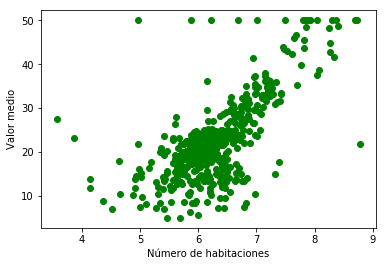

In [9]:
#Graficando los datos correspondientes
plt.scatter(X,y, color='green')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

A simple vista podemos darnos cuenta de que las variables objeto de estudio no tienen una relación estrictamente lineal, por lo que el modelo de regresión que vamos a construir tendrá un porcentaje de error muy alto.

Sin embargo, continuaremos con nuestro ejercicio separando los datos seleccionados en dos conjuntos, uno de entrenamiento (train) y otro de prueba (test). Para esta separación se tomará un 20% de los datos para utilizarlos como prueba una vez que se haya obtenido el modelo.

In [17]:
from sklearn.model_selection import train_test_split
#Separando el conjunto de datos en dos grupos: datos de entrenamiento 'train' y datos de prueba 'test' para probar el 
#algoritmo
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Una vez separado los datos, se procede a definir el algoritmo de regresión lineal (LinearRegression) que se va a utilizar. Es importante señalar que para llevar a cabo con éxito este paso, tenemos que importar la librería y los paquetes de Scikit-Learn necesarios, como se hizo en un principio.

In [18]:
#Definiendo el algoritmo a utilizar (LenearRegression de Scikit-Learn)
lr=linear_model.LinearRegression()

Ahora procedemos a entrenar el modelo empleando los datos de entrenamiento y usando el método *fit*, como se ve a continuación.

Es importante señalar que esta fase de entrenamiento del modelo nos permitirá obtener los coeficientes de la ecuación de la recta que corresponde a una regresión lineal simple.

In [19]:
#Entrenando el modelo
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
#Calculando los valores de la ecuación del modelo de Regresión Lineal Simple
print('DATOS DEL MODELO DE REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a"')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b"')
print(lr.intercept_)
print()
print('La ecuación del modelo es entonces:')
print('y= ',lr.coef_, 'x ', lr.intercept_)

DATOS DEL MODELO DE REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a"
[8.71091184]
Valor de la intersección o coeficiente "b"
-32.09014614973593

La ecuación del modelo es entonces:
y=  [8.71091184] x  -32.09014614973593


Ahora, realizamos la predicción utilizando los datos de prueba.

In [21]:
#Realizando una predicción
Y_pred=lr.predict(X_test)

Ahora graficamos los datos junto con el modelo para verlo con más detalle.

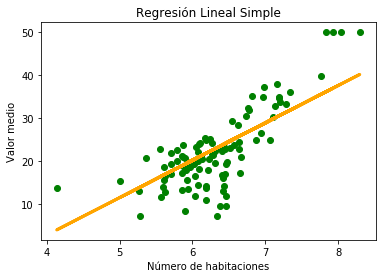

In [22]:
#Graficando los datos junto con el modelo
plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,Y_pred,color='orange',linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

Por último, se procede a comprobar los valores estadísticos que dan cuenta de la validez del modelo en la predicción o respuesta a la pregunta que se intenta resolver:

In [23]:
#Calculando los valores estadísticos
#print('Precisión del modelo')
#print(lr.score(X_train,y_train))

from sklearn.metrics import mean_squared_error, r2_score
print (u'Coeficiente de determinación R_2: %.2f' % r2_score(y_test, Y_pred))


Coeficiente de determinación R_2: 0.59


### Etapa 7: Toma de decisiones

Esta es la última etapa de la *Ciencia de Datos*. Consiste en la toma de decisiones (a partir del análisis hecho en las etapas previas) que generen un impacto en el ámbito de estudio.

De acuerdo con el valor del coeficiente de determinación obtenido anteriormente, **la precisión del modelo obtenido no es aceptable** (se aleja mucho de 1), por lo que no hay garantía de que tomemos decisiones acertadas a partir de dicho modelo. 

Por ejemplo, una pareja de recién casados que esté buscando adquirir una vivienda en Boston, no debería limitarse de visitar aquellas casas con más de cuatro habitaciones pensando que serán muy costosas, ya que con el análisis de datos realizado hasta ahora se comprobó que el precio de las viviendas de dicha localidad no tiene una relación directamente proporcional con el número de habitaciones.

## 3.- Conclusiones

El algoritmo de regresión lineal es útil cuando queremos determinar el grado de relación que existe entre dos o mas variables continuas. Puede ayudarnos a tomar decisiones o hacer prediciones acerca de situaciones desconocidas en muchos ámbitos del desenvolvimiento humano, cuando tenemos información de una variable independiente y el comportamiento de otra variable que depende de la primera.

Es importante tener en cuenta que en las primeras etapas de un proyecto de *Ciencia de Datos* estudiemos a detalle el conjunto de datos objeto de análisis buscando señales que nos lleven a suponer que el comportamiento de las variables es lineal, ya que esto nos permitirá elegir, sin pérdida de tiempo, al algoritmo de regresión lineal como una primera opción en la solución del problema.

## 4.- Referencias

**Teoría de la Regresión Lineal**

1.- <a href="https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal">Regresión lineal</a> <hr>
2.- <a href="http://www.unilibre.edu.co/revistainteraccion/volumen12/art4.pdf ">Aplicación de la regresión lienal en un problema de pobreza</a> <hr>

**Regresión lineal en aprendizaje automático**

1.- <a href="http://ligdigonzalez.com/regresion-lineal-con-scikit-learn/">Regresión lineal con Scikit-Learn</a> <hr> 
2.- <a href="http://ligdigonzalez.com/aprendizaje-supervisado-linear-regression/">Aprendizaje supervizado con el algoritmo de regresión lineal</a> <hr> 
3.- <a href="http://ligdigonzalez.com/algoritmo-regresion-lineal-simple-machine-learning-practica-con-python/">Ejercicio práctico de Machine Learning con Python</a>